# Creating Interactive Seismic Displays

In a previous [Notebook](https://github.com/iandeniset/GeophysicsNotebooks/blob/master/LoadingOpendTectSeismic.ipynb) I went over the process of loading seismic volumes from OpendTect into Python as a Numpy array along with a few simple techniques on how to display that data.

While that was a great start, it is an inefficient method, as you need to run code every time you wish to explore another time slice/inline/crossline.  Wouldn't it be great if you could have a way to control what spatial/temporal location in the data you wanted to view instantaneously?  Good news!  Not only is this dream possible, it's downright simple, thanks to IPython's interactive widgets. 

This notebook will go over the basics of IPython widgets and how I apply them to creating interactive seismic displays.

Lets get Started.

## Widget Basics

**Note: Sliders will not work unless the notebook is downloaded and run locally**

To start off, here is a super simple overview of creating slider widgets and how they work.  For a much more detailed tutorial, check out [this](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Interactive%20Widgets/Index.ipynb#) Notebook.


First lets import the modules we will need and create a simple slider widget.

In [1]:
#the usual
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
% matplotlib inline

A slider widget requires a function to evaluate when manipulated; lets create a simple function called f that will print out the value it is passed 

In [2]:
#define the function f and intiate variable 'slidervalue' to 5
def f(slidervalue=5):
    print('The value of the slider is: ', slidervalue)

Believe it or not, that was the hardest part - defining the function...seriously.  Now to use the function in the form of an interactive slider, all that we have to do it call it using the 'interact' module. 

In [3]:
#create the slider for function 'f'
interact(f)

The value of the slider is:  5


Told you it was easy.  However, some customizing of widget options such as the start, stop, and step values of the variable would be nice to have.  

Again, this is achievable with a few simple tweaks.  Lets see what those look like by modifying our previous slider call.

In [4]:
#create a slider for 'f' again, this time with start,stop, and step values
interact(f, slidervalue=(0,25,5))

The value of the slider is:  5


There we go, a slider that controls the value within a self defined function with custom start, stop, and step values.  It's easy to see how this could be very powerful for use in slicing seismic data.  Infact, lets do that now.

## Using Sliders for Interactive Seismic Displays
First we need to load in the seismic data and map it into the proper geometry.  Once again I will be using the Penobscot 3D data set obtained from the [Open Seismic Repository](https://opendtect.org/osr/) and the method of loading data from the previously mentioned [Notebook](https://github.com/iandeniset/GeophysicsNotebooks/blob/master/LoadingOpendTectSeismic.ipynb).

In [5]:
#download the subset volume I am using from the link below so you can follow along
#https://www.dropbox.com/s/y0nlkl2ykksk1ba/PEN3D_Test.txt?dl=1
from create_data import create_data

ascii_seis = np.loadtxt('/Users/IanDeniset/Desktop/PEN3D_Test.txt')
print ('The shape of the imported file is: ' , ascii_seis.shape)

seismic = create_data(ascii_seis)

The shape of the imported file is:  (288678, 503)
The inline min and max are:  1000.0 1600.0
The crossline min and max are:  1000.0 1480.0
The number of inlines is:  600.0
The number of crosslines is:  480.0
The number of time samples are:  501.0
The shape of the mapped data empty matrix is : (600, 480, 501)


Now lets define a function for plotting time slices so that we can turn it into an interactive plot with a slider.

In [6]:
def timeslice(SliceTime=972):
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.imshow(seismic[:,::-1,(SliceTime//4)], cmap='seismic', aspect='auto', clim=(-6000,6000))
    ax.set_title('Time Slice at %d' % SliceTime)
    ax.set_ylabel('Inline')
    ax.set_xlabel('Crossline')
    
    plt.show()

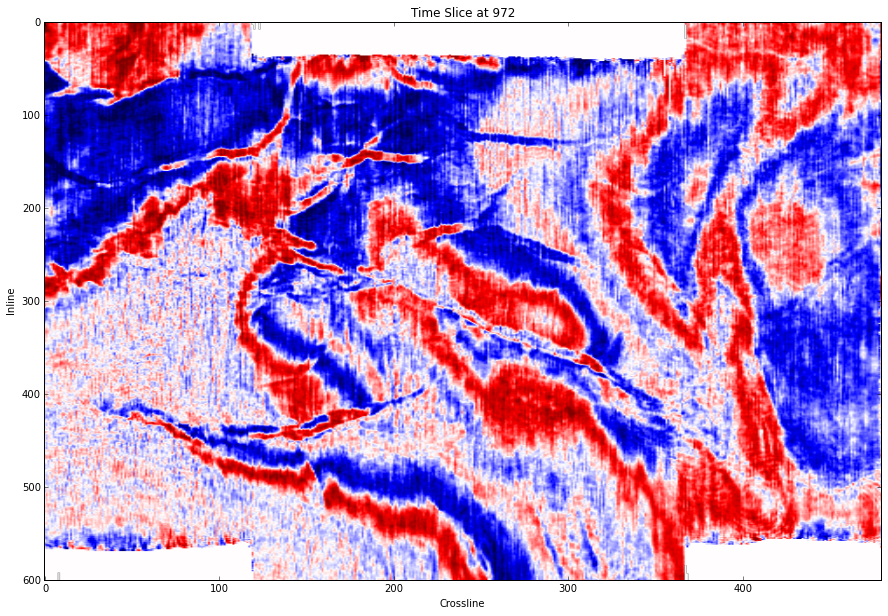

In [7]:
interact(timeslice, SliceTime=(200,2002,4))

Awesome!  We now have a way to interactively slice through our seismic data set.  Lets bring it all together now and plot a slice, inline, and crossline with controls for all of them.

In [8]:
def triple_threat_plot(SliceTime=972, Inline=300, Crossline=250):
    
    fig = plt.figure(figsize=(12,15))

    ax1 = plt.subplot2grid((2,2),(0,0), colspan=2)
    ax1.imshow(seismic[:,::-1,(SliceTime//4)], aspect='auto', cmap='seismic', clim=(-6000,6000))
    ax1.axhline(y=Inline, linewidth=4, color = 'green', alpha=0.75)
    ax1.axvline(x=Crossline, linewidth=4, color = 'green', alpha=0.75)
    ax1.set_title('Time Slice at %d ms' % SliceTime)
    ax1.set_ylabel('Inline')
    ax1.set_xlabel('Crossline')

    ax2 = plt.subplot2grid((2,2),(1,0), colspan=1)
    ax2.imshow(seismic[Inline,:,:].T, aspect='auto', cmap='seismic', clim=(-8000,8000))
    ax2.axhline(y=(SliceTime//4), linewidth=4, color = 'k', alpha=0.75)
    ax2.set_title('Inline %d' % Inline)
    ax2.set_ylabel('Time Sample')
    ax2.set_xlabel('Crossline')

    ax3 = plt.subplot2grid((2,2),(1,1), colspan=1)
    ax3.imshow(seismic[:,Crossline,:].T, aspect='auto', cmap='seismic', clim=(-8000,8000))
    ax3.axhline(y=(SliceTime//4), linewidth=4, color = 'k', alpha=0.75)
    ax3.set_title('Crossline %d' % Crossline)
    ax3.set_ylabel('Time Sample')
    ax3.set_xlabel('Inline')

    plt.tight_layout()
    plt.show()

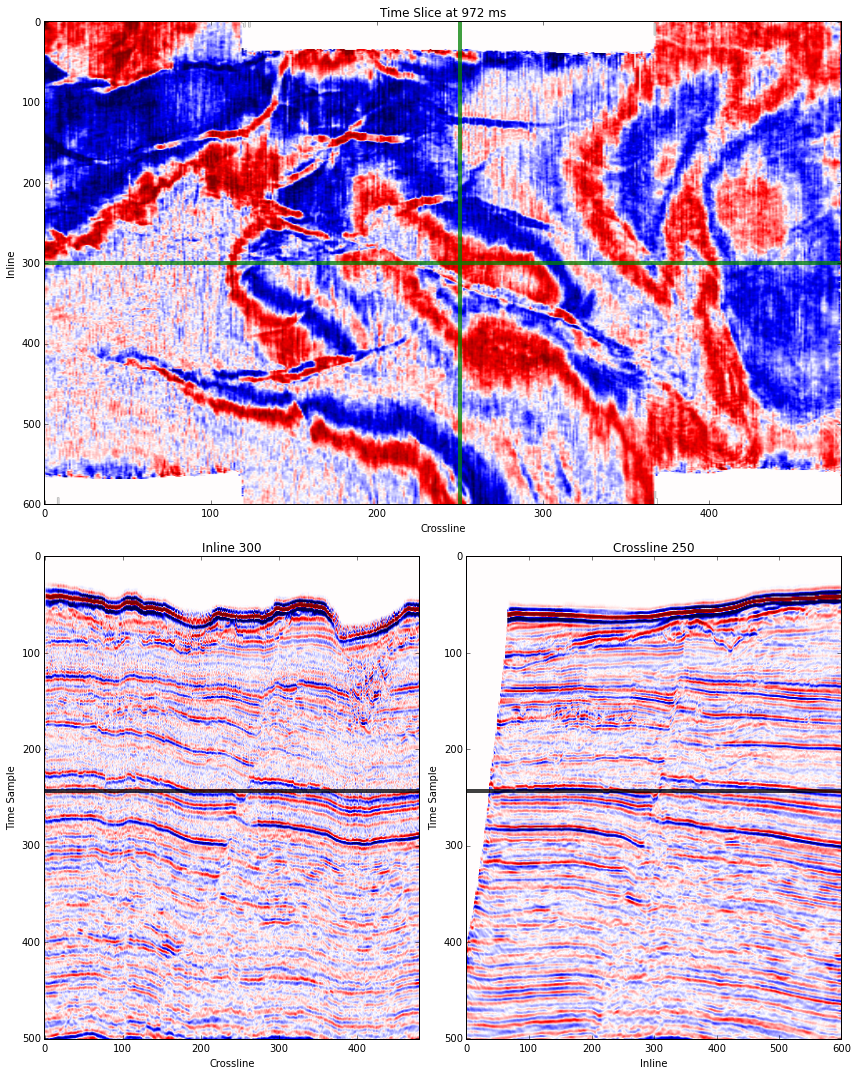

In [9]:
interact(triple_threat_plot, SliceTime=(200,2002,4), Inline=(0,600,1), Crossline=(0,480,1))

Works like a charm (though it is a little choppy).  Amazing how a simple few lines can enable us to quickly browse through our seismic volume.